# Data exploring

Discover and evaluate data insights.

### Modules and Variables

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = "../data/creditcard.csv"

### Data preview
This dataset is taken from [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud), for research and learning purposes.
> *The dataset contains transactions made by credit cards in September 2013 by European cardholders.*
>
>*This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.*
>
> *It contains only numerical input variables which are the result of a PCA transformation.*

In [4]:
data = pd.read_csv(path)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### Explore
#### How many rows and columns?

In [5]:
rows = data.shape[0]
cols = data.shape[1]
print("Number of rows:", rows)
print("Number of columns:", cols)

Number of rows: 284807
Number of columns: 31


Each line corresponds to a transaction made by a credit card in 2 days in September 2013 by European cardholders.

#### Are there any duplicate rows?

In [6]:
print("Duplicate rows: ", data.duplicated().sum())

Duplicate rows:  1081


#### What is the meaning of each columns?

- **Time**: the seconds elapsed between each transaction and the first transaction in the dataset.
- **V1** - **V28**: are the principal components obtained with PCA (Principal Component Analysis), due to confidentiality issues, they cannot provide the original features and more background information about the data.
- **Amount**: transaction amount.
- **Class**: the response variable and it takes value 1 in case of fraud and 0 otherwise.

#### What data type is each column?


In [7]:
pd.DataFrame(data.dtypes).T.rename(index={0: 'type'})

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
type,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64


#### What is the meaning of each row?

As you can see, except for **Class** that has *int64* values, but it is essentially nominal attribute, the rest of the columns are of numeric type.

In [8]:
nominal_cols = ['Class']
numeric_cols = data.columns.drop(nominal_cols)


#### How is the distribution of the *float64* columns?

In [9]:
def missing_rate(df):
    return df.isna().sum() / len(df) * 100

In [10]:
missing_numeric = data[numeric_cols].agg([missing_rate])
missing_numeric

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
missing_rate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There doesn't exist any columns with missing data, the reason is that this is a preprocessed dataset before upload, so it's pretty obvious.


#### How is the distribution of the *nominal* columns?

In [11]:
def num_of_diff(df):
    return df.nunique()

In [12]:
missing_nominal = data[nominal_cols].agg([missing_rate, num_of_diff])
missing_nominal

,Class
missing_rate,0.0
num_of_diff,2.0


0    99.827251
1     0.172749
Name: Class, dtype: float64

[Text(0.5, 0, 'Class'),
 Text(0, 0.5, 'Rate'),
 Text(0.5, 1.0, 'Distribution of class')]

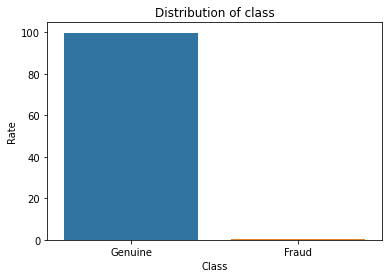

In [13]:
classes = data['Class'].value_counts(normalize=True)*100
display(classes) 

class_label = ['Genuine', 'Fraud']

ax = sb.barplot(x = class_label, y = classes)
ax.set(xlabel='Class', ylabel = 'Rate', title='Distribution of class')

This dataset is heavily imbalanced, and skewed towards *0 - Genuine* class  (accounting for 99.8%).

Also, we can see further distributions of the other features.

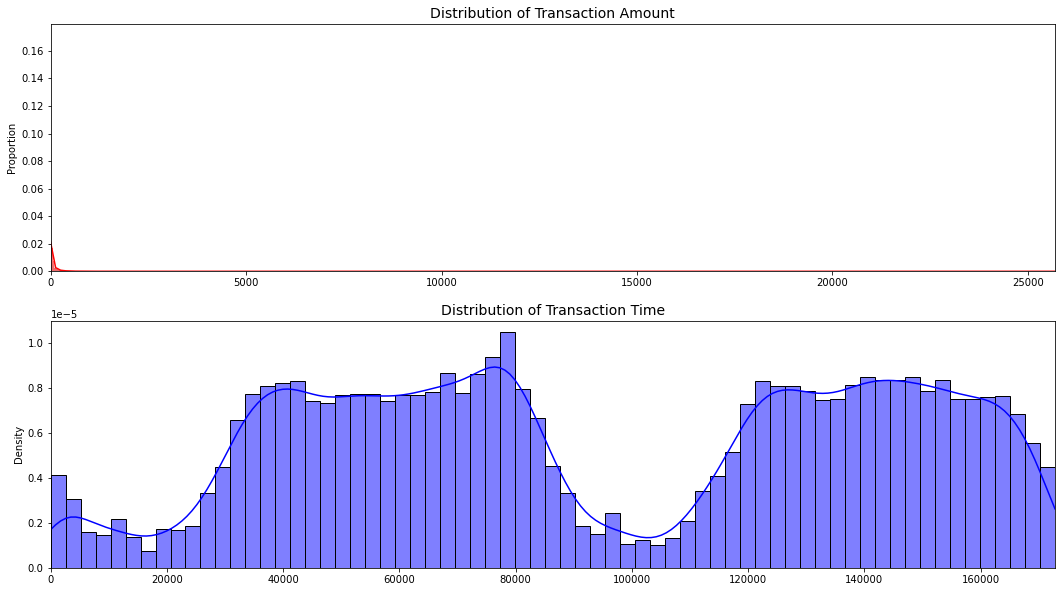

In [34]:
fig, ax = plt.subplots(2, 1, figsize=(18,10))

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.histplot(amount_val, ax=ax[0], color='r', kde=True, stat='proportion', common_norm=False)
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.histplot(time_val, ax=ax[1], color='b', kde=True, stat='density', common_norm=False)
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])


plt.show()